### Importing libraries & functions

In [110]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

### Data Loading
---

**This dataset contains information about a sample of over 100 people across the world. The data includes the following information:**

Age: The age of the person in years.

Gender: The gender of the person (male or female).

Income: The annual income of the person in US dollars.

Education: The highest level of education completed by the person.

Marital Status: The marital status of the person (single, married, divorced, or widowed).

Number of Children: The number of children the person has.

Home Ownership: Whether the person owns their home or rents it.

Credit Score: The credit score of the person, which is a measure of their creditworthiness.

In [111]:
df = pd.read_csv('/content/Credit Score Classification Dataset.csv')

### EDA (Exploratory Data Analysis)

In [112]:
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High


In [113]:
df.tail()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
159,29,Female,27500,High School Diploma,Single,0,Rented,Low
160,34,Male,47500,Associate's Degree,Single,0,Rented,Average
161,39,Female,62500,Bachelor's Degree,Married,2,Owned,High
162,44,Male,87500,Master's Degree,Single,0,Owned,High
163,49,Female,77500,Doctorate,Married,1,Owned,High


#### 1. Unique Value

In [114]:
df.nunique()

,0
Age,29
Gender,2
Income,52
Education,5
Marital Status,2
Number of Children,4
Home Ownership,2
Credit Score,3


#### 2. Data Types

In [115]:
df.dtypes

,0
Age,int64
Gender,object
Income,int64
Education,object
Marital Status,object
Number of Children,int64
Home Ownership,object
Credit Score,object


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 164 non-null    int64 
 1   Gender              164 non-null    object
 2   Income              164 non-null    int64 
 3   Education           164 non-null    object
 4   Marital Status      164 non-null    object
 5   Number of Children  164 non-null    int64 
 6   Home Ownership      164 non-null    object
 7   Credit Score        164 non-null    object
dtypes: int64(3), object(5)
memory usage: 10.4+ KB


#### 3. Statistics

In [117]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,164.0,37.975610,8.477289,25.0,30.75,37.0,45.0,53.0
Income,164.0,83765.243902,32457.306728,25000.0,57500.00,83750.0,105000.0,162500.0
Number of Children,164.0,0.652439,0.883346,0.0,0.00,0.0,1.0,3.0


#### 4. Null Values

In [118]:
df.isna().any()

,0
Age,False
Gender,False
Income,False
Education,False
Marital Status,False
Number of Children,False
Home Ownership,False
Credit Score,False


In [119]:
df.isna().sum()

,0
Age,0
Gender,0
Income,0
Education,0
Marital Status,0
Number of Children,0
Home Ownership,0
Credit Score,0


#### 5. Categorical Values

In [120]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols

['Gender', 'Education', 'Marital Status', 'Home Ownership', 'Credit Score']

#### Label Encoding Categorical Values

In [135]:
# Create a label encoder object
le = LabelEncoder()

for col in cat_cols:
  """Fit the label encoder object to the dataset and
  transform the dataset using the label encoder object"""
  df[col] = le.fit_transform(df[col])

# get list of categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols


[]

In [136]:
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,0,50000,1,1,0,1,0
1,30,1,100000,4,0,2,0,0
2,35,0,75000,2,0,1,0,0
3,40,1,125000,3,1,0,0,0
4,45,0,100000,1,0,3,0,0


#### 6. Correlation

In [132]:
df.corr()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
Age,1.000000,0.235343,0.699464,0.170254,-0.517723,0.055390,-0.713803,NaN
Gender,0.235343,1.000000,0.495738,0.248671,0.278362,-0.442139,-0.031519,NaN
Income,0.699464,0.495738,1.000000,0.369449,-0.471004,0.084547,-0.704928,NaN
Education,0.170254,0.248671,0.369449,1.000000,-0.067797,0.047311,-0.397043,NaN
Marital Status,-0.517723,0.278362,-0.471004,-0.067797,1.000000,-0.696984,0.708374,NaN
Number of Children,0.055390,-0.442139,0.084547,0.047311,-0.696984,1.000000,-0.497129,NaN
Home Ownership,-0.713803,-0.031519,-0.704928,-0.397043,0.708374,-0.497129,1.000000,NaN
Credit Score,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

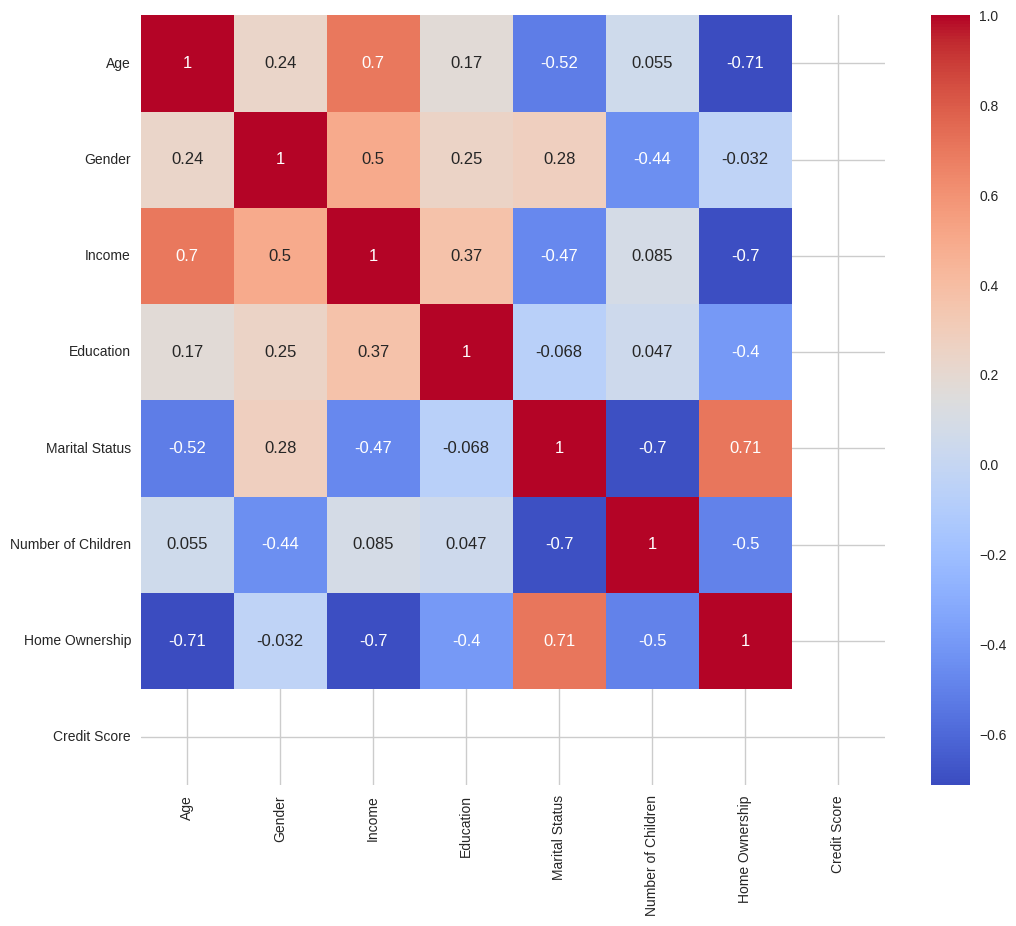

In [133]:
# Set the size of the figure to 12 by 10
plt.figure(figsize=(12,10))

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

#### 7. Class Distribution

In [134]:
# Count the number of instances in each class
class_counts = df['Credit Score'].value_counts()

print("Class distribution:")
print(class_counts)

Class distribution:
Credit Score
0    164
Name: count, dtype: int64


### SMOTE(Synthetic Minority Oversampling Technique)

Technique used in machine learning to address imbalanced datasets.

In [ ]:
X = df.drop("Credit Score", axis=1)
y = df["Credit Score"]
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, x_test = train_test_split(X, y, test_size=0.2, random_state=42)

from imblearn.over_sampling import SMOTE

# Create a SMOTE object
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Print class distribution of original and resampled data
print("Class distribution before resampling: ", y_train.value_counts())
print("Class distribution after resampling: ", y_train_res.value_counts())

# Visualizations
---

### 1. Pair Plot

In [ ]:
sns.pairplot(df)

### 2. Pie Chart

In [ ]:
# Count the number of instances in each class
class_counts = df['Credit Score'].value_counts()

# Create a list of labels
labels = ["Low", "Average", "High"]

# Create a list of values
values = class_counts.values

# Plot the pie chart
plt.pie(values, labels=labels, autopct="%1.0f%%")

# Add a title
plt.title("Class Count Distribution")

# Show the plot
plt.show()

### 3. Null Plot

In [ ]:
import missingno as msno
# Null count analysis
null_plot = msno.bar(df)

### Other Important Plots

In [ ]:
def plots(df, variable):
  if df[variable].dtype != object:
    # define figure size
    fig, ax = plt.subplots(1, 5, figsize=(24, 4))

    # histogram
    sns.histplot(df[variable], bins=30, kde=True, ax=ax[0])
    ax[0].set_title('Histogram')

    # KDE plot
    sns.kdeplot(df[variable], ax=ax[1])
    ax[1].set_title('KDE Plot')

    # Line plot
    sns.lineplot(df[variable], ax=ax[2])
    ax[2].set_title('Line Plot')

    # boxplot
    sns.boxplot(y=df[variable], ax=ax[3])
    ax[3].set_title('Boxplot')

    # scatterplot
    sns.scatterplot(x=df.index, y=df[variable], ax=ax[4])
    ax[4].set_title('Scatterplot')

    plt.tight_layout()
    plt.show()

for i in df.columns:
    plots(df ,i)

# ML Modelling
---

In [ ]:
# Combine X_train_res and y_train_res
train_data = pd.concat([X_train_res, y_train_res], axis=1)

from pycaret.classification import *
s = setup(data=train_data, target='Credit Score', session_id=123, normalize=True)

### 1. Comparing models

In [ ]:
compare_models()

### 1. KNN Model

In [ ]:
knn = create_model('knn')

In [ ]:
preds = predict_model(knn)

In [ ]:
from sklearn.model_selection import cross_val_score

# Evaluate the ensemble model using cross-validation
scores = cross_val_score(knn, X_train_res, y_train_res, cv=20)

In [ ]:
preds = predict_model(knn)

### 3. Plots

In [ ]:
plot_model(knn)

In [ ]:
plot_model(knn, plot='error')

In [ ]:
plot_model(knn, plot="learning")

In [ ]:
plot_model(knn, plot="vc")

### 4. Traditionla Approach

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()


# Fit the Extra Trees Classifier object to the dataset

clf.fit(X_train_res, y_train_res)

scores = cross_val_score(knn, X_train_res, y_train_res, cv=20)

# Predict the labels for the test data
y_preds = clf.predict(X_test)
y_preds

### 5. Classification Report

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_preds))

### 5. Confusion Matrix

In [ ]:
print("Confusion Matric:")
print(confusion_matrix(y_test, y_preds))